In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
#Load and preprocess the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#Build auto encoder using dense layer
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')


In [4]:
#train the auto encoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.4456 - val_loss: 0.3117
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3054 - val_loss: 0.3012
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2966 - val_loss: 0.2935
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.2898 - val_loss: 0.2898
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2878 - val_loss: 0.2886
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2847 - val_loss: 0.2849
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.2823 - val_loss: 0.2832
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2803 - val_loss: 0.2819
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.2794 - val_loss: 0.2806
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2782 - val_loss: 0.2796
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2773 - val_loss: 0.2797
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


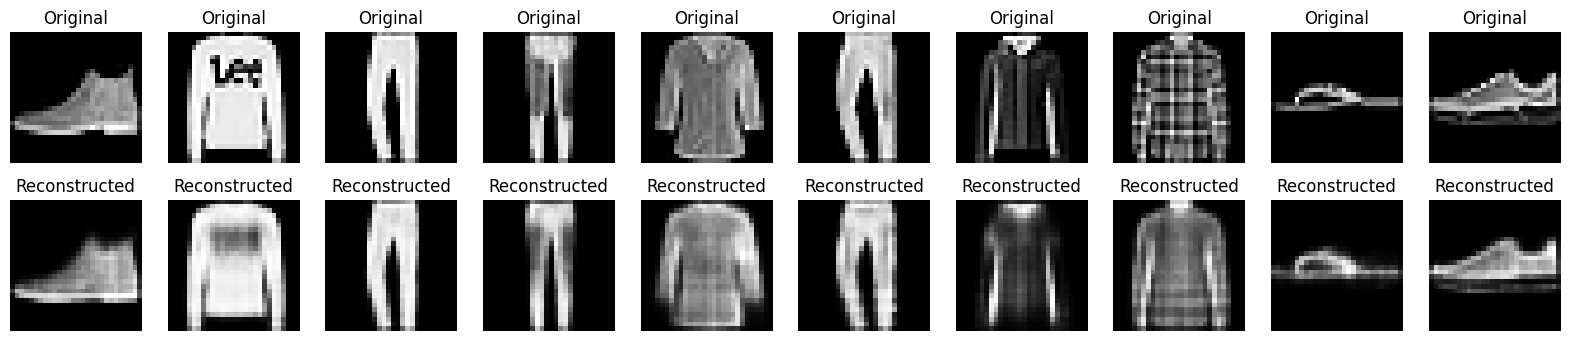

In [5]:
#visualize the result
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


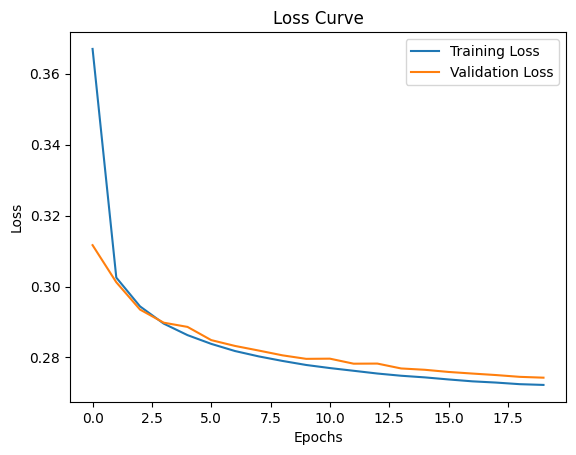

In [6]:
#Analyse the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()


In [7]:
# Model B: Experimented Autoencoder
input_img = Input(shape=(784,))

# Encoder
x = Dense(256, activation='relu')(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

# Decoder
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

autoencoder_b = Model(input_img, decoded)
autoencoder_b.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train Model B
history_b = autoencoder_b.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.4308 - val_loss: 0.3114
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.3065 - val_loss: 0.2996
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2963 - val_loss: 0.2946
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.2917 - val_loss: 0.2909
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.2883 - val_loss: 0.2890
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.2856 - val_loss: 0.2858
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2832 - val_loss: 0.2845
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.2819 - val_loss: 0.2831
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2809 - val_loss: 0.2822
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.2798 - val_loss: 0.2810
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.2787 - val_loss: 0.2801
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━

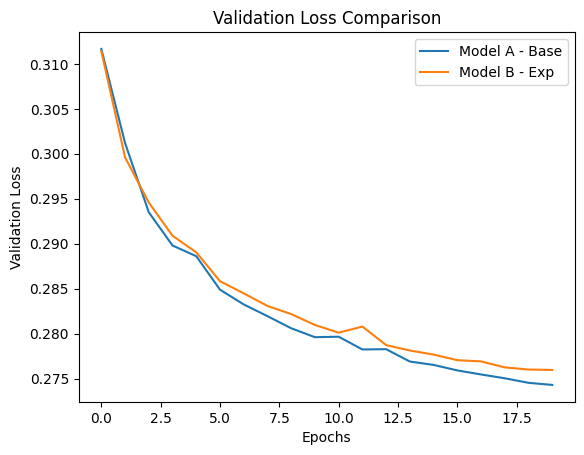

In [8]:
# Plot both models' loss curves
plt.plot(history.history['val_loss'], label='Model A - Base')
plt.plot(history_b.history['val_loss'], label='Model B - Exp')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title("Validation Loss Comparison")
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


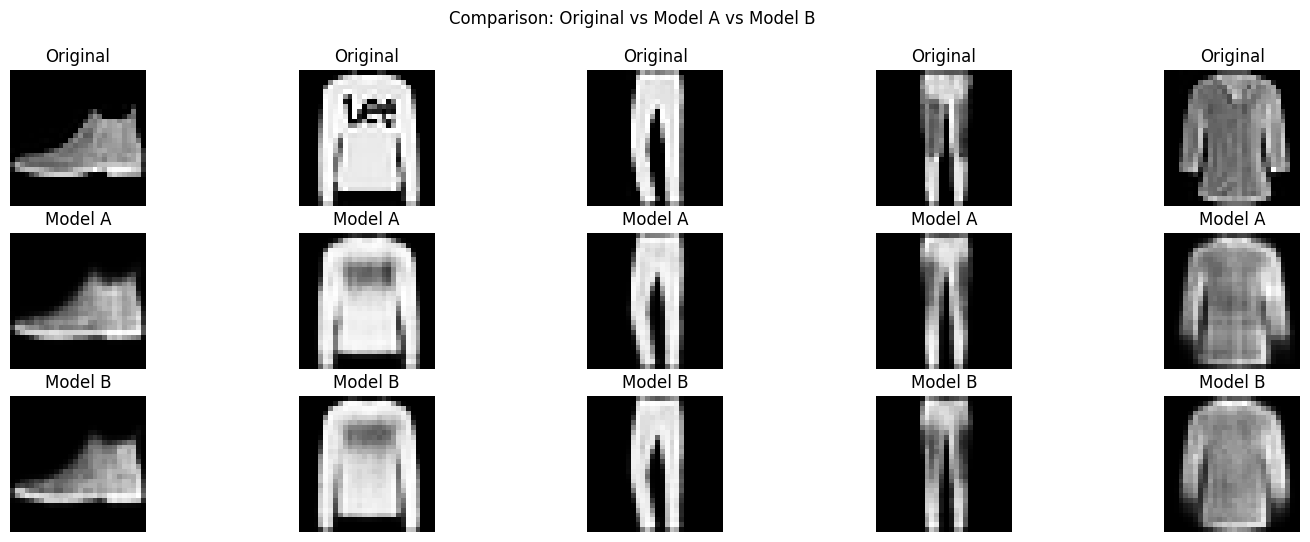

In [9]:
# Generate reconstructions
decoded_imgs_a = autoencoder.predict(x_test)
decoded_imgs_b = autoencoder_b.predict(x_test)

n = 5
plt.figure(figsize=(18, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Model A
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs_a[i].reshape(28, 28), cmap='gray')
    plt.title("Model A")
    plt.axis('off')

    # Model B
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_b[i].reshape(28, 28), cmap='gray')
    plt.title("Model B")
    plt.axis('off')

plt.suptitle("Comparison: Original vs Model A vs Model B")
plt.show()
